In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
stock_data = pd.read_csv('STOCK_US_XNYS_RCL.csv') #https://www.marketwatch.com/investing/stock/rcl/download-data?startDate=1/1/2024&endDate=05/21/2024
stock_data.head(5)

,Date,Open,High,Low,Close,Volume
0,05/21/2024,146.86,150.83,146.37,150.75,"2,470,112"
1,05/20/2024,143.30,150.90,143.30,147.70,"3,493,745"
2,05/17/2024,143.16,143.95,141.33,141.92,"1,286,606"
3,05/16/2024,141.00,144.34,140.41,142.86,"2,658,620"
4,05/15/2024,141.59,141.59,139.20,140.64,"1,782,922"


In [3]:
df = pd.DataFrame(stock_data)

In [4]:
df.describe()

,Open,High,Low,Close
count,98.000000,98.000000,98.000000,98.000000
mean,129.708571,131.429082,127.933980,129.611122
std,8.233702,8.322550,8.270475,8.461363
min,114.510000,115.580000,113.100000,114.900000
25%,123.325000,124.760000,121.365000,123.367500
50%,128.285000,129.660000,126.255000,127.655000
75%,137.180000,139.015000,135.817500,137.252500
max,146.860000,150.900000,146.370000,150.750000


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['DaysFromOrigin'] = abs(df['Date']-df['Date'][0]).dt.days #categorize by days from dataset start
df['DaysFromOrigin']

0       0
1       1
2       4
3       5
4       6
     ... 
93    134
94    137
95    138
96    139
97    140
Name: DaysFromOrigin, Length: 98, dtype: int64

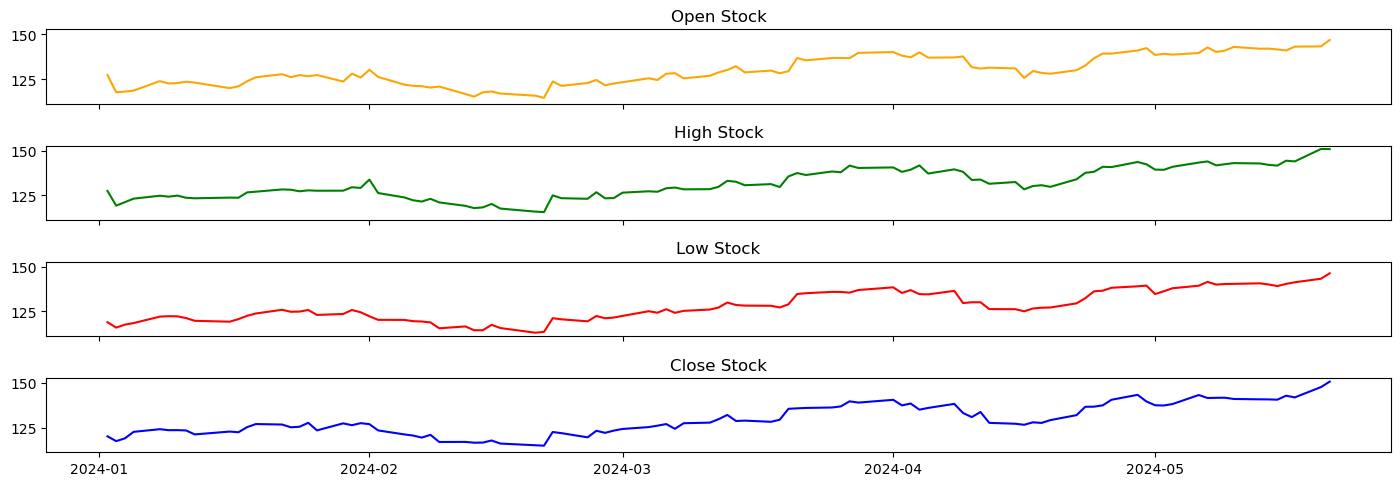

In [6]:
#graphs of stock values over time according to the dataset
fig, axs = plt.subplots(4, sharex=True, sharey=True) 
axs[0].plot(df['Date'],df['Open'],color="orange")
axs[0].set_title('Open Stock')
axs[1].plot(df['Date'],df['High'],color="green")
axs[1].set_title('High Stock')
axs[2].plot(df['Date'],df['Low'],color="red")
axs[2].set_title('Low Stock')
axs[3].plot(df['Date'],df['Close'],color="blue")
axs[3].set_title('Close Stock')
fig.tight_layout()
fig.set_figwidth(15)
fig.set_figheight(5)

In [7]:
#prepare data for model
X=df['DaysFromOrigin'].values 
Y=df['Open'].values
X = X.reshape(-1,1)
X.shape, Y.shape

((98, 1), (98,))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train, Y_train) #training
#testing the regressor
Y_test_pred = model.predict(X_test)
#calculating errors
lr_MSE = np.mean((Y_test - Y_test_pred)**2)
lr_MAE = np.mean(np.abs(Y_test - Y_test_pred))
lr_MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', lr_MSE)
print('MAE=', lr_MAE)
print('MAPE=', lr_MAPE)

MSE= 24.977393526108425
MAE= 4.445947785212892
MAPE= 0.03485269434918557


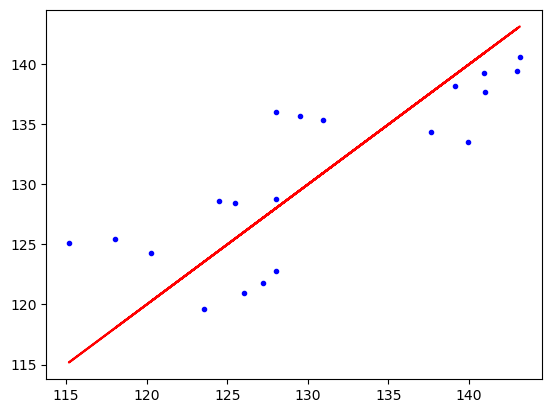

In [10]:
#plotting test data (blue) and regressor (red line)
fig, ax = plt.subplots()
ax.plot(Y_test, Y_test_pred, '.b')
ax.plot(Y_test, Y_test, '-r')

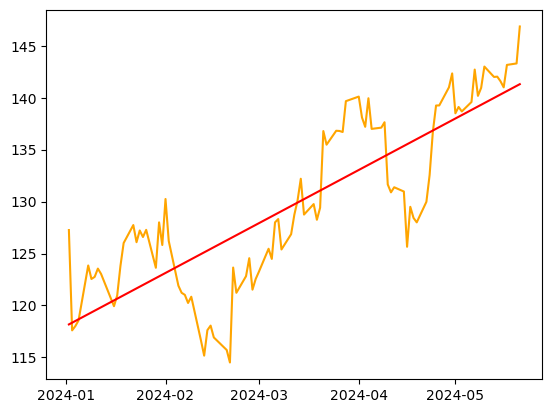

In [11]:
#run model on entire X to showcase regressor)
Y_pred = model.predict(X) 
fig, ax = plt.subplots()
ax.plot(df['Date'],df['Open'],color="orange")
ax.plot(df['Date'], Y_pred, color="red")